# **Desafío: hora de la práctica**

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con **pandas**.

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro `max_depth` del algoritmo `DecisionTreeClassifier` y el valor 2 para el `max_depth` del algoritmo `RandomForestClassifier`, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método `predict` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [ ]:
import pandas as pd

datos = pd.read_csv('../data/diabetes.csv')
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [2]:
# Tarea 1: Dividir los datos en variables explicativas y variable objetivo
X = datos.drop(columns=['diabetes'], axis=1)
y = datos.diabetes

In [3]:
# Traea 2: Realizar la división de los datos en entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [4]:
# Tarea 3: Construir modelos y evaluar la precisión

# Importar los modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Construir los modelos
modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_rf = RandomForestClassifier(max_depth=2, random_state=5)
# Ajustar los modelos
modelo_dt.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)
# Evaluar los modelos
print(f'La exactitud del modelo Decision Tree con el conjunto de entrenamiento es: {modelo_dt.score(X_train, y_train):.2%}')
print(f'La exactitud del modelo Decision Tree con el conjunto de validación es: {modelo_dt.score(X_val, y_val):.2%}')
print(f'La exactitud del modelo Random Forest con el conjunto de entrenamiento es: {modelo_rf.score(X_train, y_train):.2%}')
print(f'La exactitud del modelo Random Forest con el conjunto de validación es: {modelo_rf.score(X_val, y_val):.2%}')

La exactitud del modelo Decision Tree con el conjunto de entrenamiento es: 76.40%
La exactitud del modelo Decision Tree con el conjunto de validación es: 63.10%
La exactitud del modelo Random Forest con el conjunto de entrenamiento es: 76.80%
La exactitud del modelo Random Forest con el conjunto de validación es: 65.48%


In [6]:
# Tarea 4: Construir la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Evaluar los modelos con el conjunto de validación
y_prev_dt = modelo_dt.predict(X_val)
y_prev_rf = modelo_rf.predict(X_val)

print(f'Matriz de confusión para el modelo Decision Tree:\n{confusion_matrix(y_val, y_prev_dt)}')
print(f'Matriz de confusión para el modelo Random Forest:\n{confusion_matrix(y_val, y_prev_rf)}')

Matriz de confusión para el modelo Decision Tree:
[[48  8]
 [23  5]]
Matriz de confusión para el modelo Random Forest:
[[50  6]
 [23  5]]


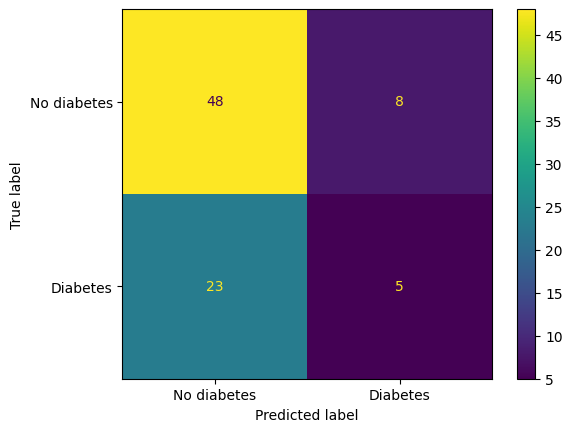

In [7]:
# Visualización de la matriz de confusión para el modelo Decision Tree
ConfusionMatrixDisplay.from_predictions(y_val, y_prev_dt, display_labels=['No diabetes', 'Diabetes']);

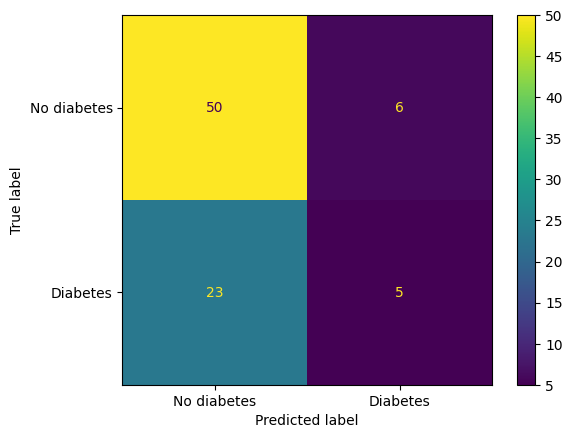

In [8]:
# Visualización de la matriz de confusión para el modelo Random Forest
ConfusionMatrixDisplay.from_predictions(y_val, y_prev_rf, display_labels=['No diabetes', 'Diabetes']);

# **Desafío: hora de la práctica**

1 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método [RocCurveDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).

3 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método [PrecisionRecallDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_predictions).

4 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) de la biblioteca Scikit-Learn.

> *Como consejo, revisa la documentación de Scikit-learn desde este [enlace](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) y verifica una forma de presentar los resultados de las curvas en el mismo gráfico usando matplotlib.*

In [9]:
# Tarea 1: Importar las métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
print(f'La precisión del modelo tree es: {precision_score(y_val, y_prev_dt):.2%}')
print(f'La sensibilidad del modelo tree es: {recall_score(y_val, y_prev_dt):.2%}')
print(f'La exactitud del modelo tree es: {accuracy_score(y_val, y_prev_dt):.2%}')
print(f'El F1-score del modelo tree es: {f1_score(y_val, y_prev_dt):.2%}')

La precisión del modelo tree es: 38.46%
La sensibilidad del modelo tree es: 17.86%
La exactitud del modelo tree es: 63.10%
El F1-score del modelo tree es: 24.39%


In [11]:
print(f'La precisión del modelo forest es: {precision_score(y_val, y_prev_rf):.2%}')
print(f'La sensibilidad del modelo forest es: {recall_score(y_val, y_prev_rf):.2%}')
print(f'La exactitud del modelo forest es: {accuracy_score(y_val, y_prev_rf):.2%}')
print(f'El F1-score del modelo forest es: {f1_score(y_val, y_prev_rf):.2%}')

La precisión del modelo forest es: 45.45%
La sensibilidad del modelo forest es: 17.86%
La exactitud del modelo forest es: 65.48%
El F1-score del modelo forest es: 25.64%


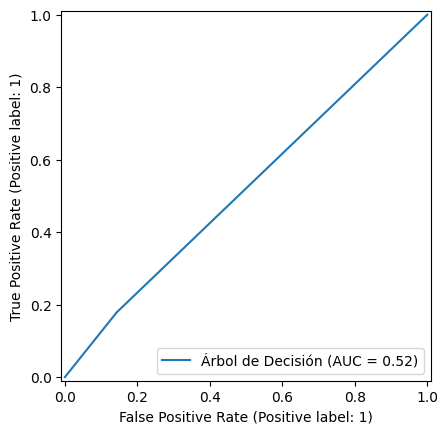

In [12]:
# Tarea 2: Evaluar el rendimiento del modelo con gráficos
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Visualización de la curva de ROC
RocCurveDisplay.from_predictions(y_val, y_prev_dt, name='Árbol de Decisión');

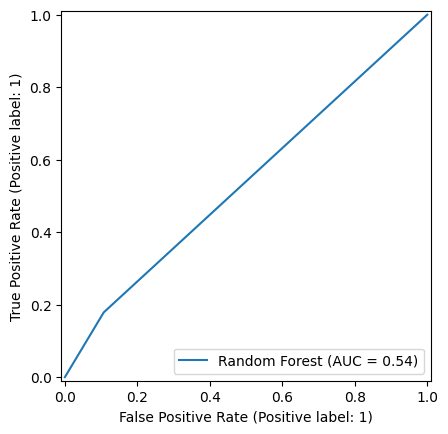

In [13]:
RocCurveDisplay.from_predictions(y_val, y_prev_rf, name='Random Forest');

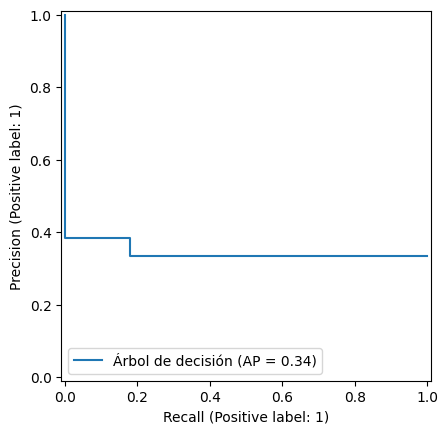

In [14]:
# Tarea 3: Visualización de la curva de precisión-recall
PrecisionRecallDisplay.from_predictions(y_val, y_prev_dt, name='Árbol de decisión');

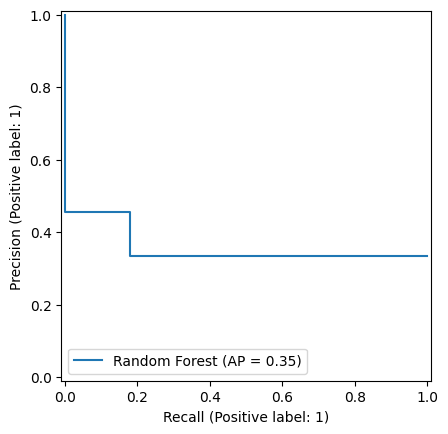

In [15]:
PrecisionRecallDisplay.from_predictions(y_val, y_prev_rf, name='Random Forest');

In [16]:
# Tarea 4: Resumen de las principales métricas de clasificación
from sklearn.metrics import classification_report

In [17]:
# Imprimir el reporte de clasificación para el modelo Decision Tree
print(classification_report(y_val, y_prev_dt, target_names=['Diabetes', 'No Diabetes']))

              precision    recall  f1-score   support

    Diabetes       0.68      0.86      0.76        56
 No Diabetes       0.38      0.18      0.24        28

    accuracy                           0.63        84
   macro avg       0.53      0.52      0.50        84
weighted avg       0.58      0.63      0.59        84



In [18]:
# Imprimir el reporte de clasificación para el modelo Random Forest
print(classification_report(y_val, y_prev_rf, target_names=['Diabetes', 'No Diabetes']))

              precision    recall  f1-score   support

    Diabetes       0.68      0.89      0.78        56
 No Diabetes       0.45      0.18      0.26        28

    accuracy                           0.65        84
   macro avg       0.57      0.54      0.52        84
weighted avg       0.61      0.65      0.60        84



# **Desafío: hora de la práctica**

1 - En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

> Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]

2 - KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes, con el uso del parámetro `n_splits` y mezclando los datos antes de la separación con el parámetro `shuffle`. Usa el método [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que no retorna el tiempo de ejecución, solo las métricas.

3 - En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (`cross_val_score`) con el método [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando el parámetro `n_splits` y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro `scoring`.

4 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (`cross_val_score`) con el método [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

> *El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método `mean()`, sin utilizar el intervalo de confianza.*

1 - A partir de los resultados, podemos extraer la media y la desviación estándar y generar el intervalo de confianza que está a una distancia de dos desviaciones estándar por debajo y por encima de esa media:

In [19]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

2 - El primer paso a realizar es importar la función cross_val_score y el método KFold:

In [20]:
from sklearn.model_selection import cross_val_score, KFold

Hecho esto, vamos a inicializar los modelos y utilizar el KFold con `n_splits=10` para generar una división de 10 partes. Además, utilizaremos el parámetro `shuffle=True` para barajar los datos antes de realizar la separación.

Posteriormente, vamos a usar el método `cross_val_score` para realizar el procedimiento de validación cruzada con los dos modelos y generar el intervalo de confianza a partir de los resultados:

In [21]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = kf)
resultado_rf = cross_val_score(random_forest, X, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.4980789379666014, 0.8717962848497979]
Intervalo de confianza (Random Forest): [0.5129805025617129, 0.8993189626789289]


3 - El primer paso a realizar es importar la función `cross_val_score` y el método `StratifiedKFold`:

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

El paso sigue de forma muy parecida al desafío anterior, diferenciándose en la elección del método de validación que será estratificado, con el método StratifiedKFold. Además, la métrica de evaluación necesita ser alterada a f1, a partir del parámetro `scoring` de la función `cross_val_score`:

In [23]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, X, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest') 

Intervalo de confianza (Decision Tree): [0.07111000888791685, 0.6370059845098103]
Intervalo de confianza (Random Forest): [0.025566011552843215, 0.6565736135279582]


4 - El primer paso a realizar es importar la función `cross_val_score` y el método `LeaveOneOut`:

In [24]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

La construcción del código se da de forma muy parecida a los desafíos anteriores. Primero, los modelos son inicializados y luego se inicializa el método `LeaveOneOut`, sin la necesidad de definir parámetros, ya que recorre toda la base de datos hasta que todos los valores han sido elegidos como datos de validación y el resto como datos de entrenamiento.

Aquí vamos a calcular solo la media de los resultados, por lo tanto, utilizaremos el método `mean()` en cada una de las listas de resultados para obtener la precisión media.

In [25]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X, y, cv = loo)
resultado_rf = cross_val_score(random_forest, X, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}') 

Precisión media (Decision Tree): 0.6916167664670658
Precisión media (Random Forest):0.688622754491018


# **Desafío: hora de la práctica**

1 - El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método `value_counts(normalize=True)` o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca `seaborn` para entender si hay un desbalanceo de datos.

2 - Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con [**SMOTE**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obteniendo la media del F1-Score de una validación cruzada con `StratifiedKFold`.

3 - Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un `pipeline` que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con `NearMiss` en su versión 3, obteniendo la media del F1-Score de una validación cruzada con `StratifiedKFold`.

4 - Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. Realiza la evaluación del modelo usando los datos de prueba que fueron separados al inicio de los desafíos, obteniendo el informe de métricas y matriz de confusión.

## **Solución**

1 - Para chequear la proporción de los datos en la variable objetivo, podemos usar el método [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) que realiza el conteo de los datos de cada categoría de la columna. También podemos usar el parámetro `normalize = True` para devolver el resultado en porcentaje:

In [26]:
datos['diabetes'].value_counts(normalize = True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

Otra forma de analizar es a través de un gráfico. Podemos usar el [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) de la biblioteca `seaborn`:

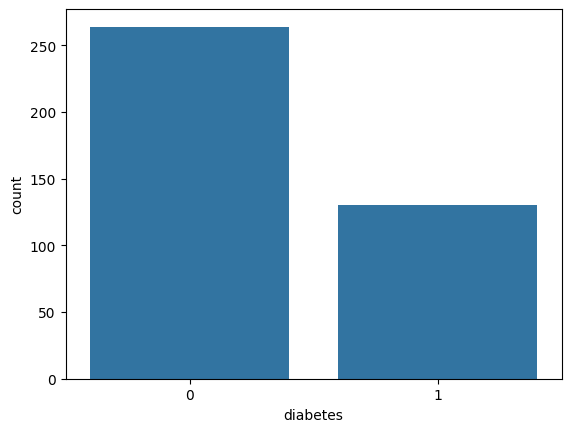

In [27]:
import seaborn as sns 

sns.countplot(datos, x = 'diabetes');

2 - El primer paso es importar el método Pipeline y el SMOTE para balancear los datos:

In [28]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de oversampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [29]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5843989318472077


In [30]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}') 

F1 (Random Forest):0.6181859869820889


3 - El primer paso es importar el método Pipeline y el NearMiss para balancear los datos:

In [31]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de undersampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [32]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}') 

F1 (Decision Tree):0.5401336186163772


In [33]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.5913075073075074


4 - El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el `max_depth = 2` en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora:

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        40
           1       0.52      0.65      0.58        20

    accuracy                           0.68        60
   macro avg       0.66      0.68      0.66        60
weighted avg       0.71      0.68      0.69        60



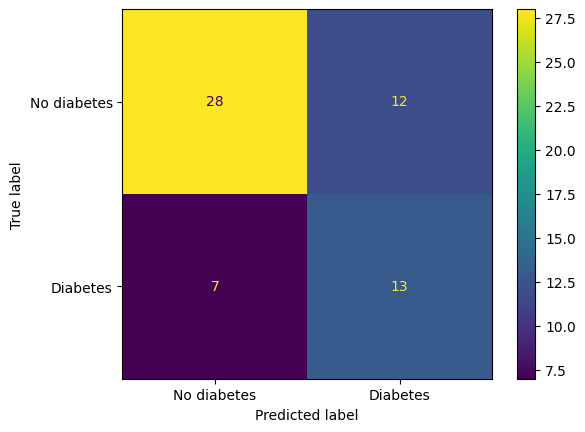

In [38]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto, display_labels=['No diabetes', 'Diabetes']);